<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Feature selection</h1>

## 1. Aims
<div class="alert alert-info">
To carry out feature selection on the leukaemia data.
</div>

## 2. Feature selection 
<div class="alert alert-info">
On the course webpage, you can download a (slightly reduced) version of the leukaemia data. It consists of some training data $X$ and associated labels $t$ as well as independent test data $X_{test}$ and $t_{test}$. Your task is to select some features and classify the data – in previous labs we have implemented code for classification and you may use whichever you like.
</div>

In [1]:
import numpy as np
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
leuk = scipy.io.loadmat('data/labdata.mat')

In [2]:
X = leuk['X']
t = leuk['t']
X_test = leuk['X_test']
t_test = leuk['t_test']

<div class="alert alert-info">
Observe the class distribution of the data.
</div>

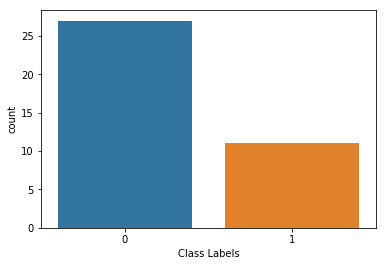

In [3]:
sns.countplot(t[:,0])
plt.xlabel('Class Labels')
plt.show()

Input dimension

In [4]:
X.shape[1]

300

### 2.1 Feature selection 
<div class="alert alert-info">
You are free to use any of the feature selection schemes we covered – scoring the features, PCA, or clustering them (you should already have $k$-means code to do this). In each case, you should use the test set to investigate how performance varies as you change the number of features.</div>

#### 2.1.1 Scoring 
<div class="alert alert-info">
Use the scoring mechanism described in the lectures (only on the training data) to obtain a set of features (corresponding to a subset of the original ones). You should make sure you extract this subset from the test data too!
</div>

In [5]:
def order_features_by_score(X):
    """
    Order features by relative class distance
        X (np array): input data
        Returns index of ordered features by score and relative scores
    """
    
    m0 = X[t[:,0]==0].mean(axis=0)
    m1 = X[t[:,0]==1].mean(axis=0)
    s0 = X[t[:,0]==0].var(axis=0)
    s1 = X[t[:,0]==1].var(axis=0)
    
    # compute relative class distance for each feature
    s = np.abs(m0-m1)/(s0+s1)
    
    # sort X columns (features) by score
    sorted_idx = np.argsort(s)[::-1]
    sorted_score = np.sort(s)[::-1]
    
    return sorted_idx, sorted_score

In [6]:
ordered_features, scores = order_features_by_score(X)

# print the top 10 features
for i in range(10):
    print('idx {}, score: {}'.format(ordered_features[i], scores[i]))

idx 50, score: 6.011058037272707
idx 129, score: 4.577095690783484
idx 179, score: 4.451846850434147
idx 190, score: 4.424452000674536
idx 29, score: 4.420369389720395
idx 39, score: 4.3960300683932365
idx 96, score: 4.353329041559555
idx 13, score: 4.329837643000831
idx 143, score: 4.3000163383796055
idx 166, score: 4.193222001809673


<div class="alert alert-info">
Plot the data by considering the top 2 features and comment on the results.
</div>

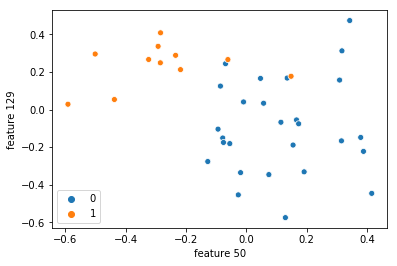

In [42]:
sns.scatterplot(X[:,ordered_features[0]], X[:,ordered_features[1]], hue=t[:,0])
plt.xlabel('feature ' + str(ordered_features[0]))
plt.ylabel('feature ' + str(ordered_features[1]))
plt.legend(loc='lower left')
plt.show()

<div class="alert alert-info">
Does the visualisation of separate classes improve if you consider the top 3 features instead?</div>

> As we are considering one more feature, the result cannot get worse but only improve or remaining the same

#### 2.1.2 Clustering
<div class="alert alert-info">

You can use the $k$-means code you implemented in the previous notebook. Remember to pass the data the correct way around and only cluster the training data. Transforming the test data is a little more complex – your $k$-means should give you assignments of features to clusters. Use these alongside the test data to compute the cluster means for the test data (you do not need to re-assign the clusterings).

</div>

In [8]:
from utils import kmeans

In [52]:
nclusters = 2
clusters, centroids = kmeans(X.T, k=nclusters)

# assign test data to clusters and use centroids as new features
clustX_test = []
for k in range(nclusters):
    features = X_test.T[clusters[k]]
    m = features.mean(axis=0)
    clustX_test.append(m)
    
clustX_test = np.array(clustX_test).T

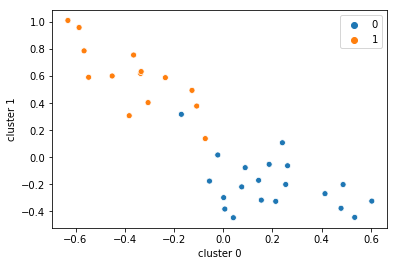

In [53]:
sns.scatterplot(clustX_test[:,0], clustX_test[:,1], hue=t_test[:,0])
plt.xlabel('cluster 0')
plt.ylabel('cluster 1')
plt.show()

#### 2.1.3 Principal components
<div class="alert alert-info">
Implement a function for obtaining the $k$ principal components of your data.
Try to avoid using 'sklearn' libraries for this task!
</div>

In [91]:
def pca_k(X, k=2):
    cov_X = np.cov(X.T)
    _, eig_matrix = np.linalg.eig(cov_X)
    return eig_matrix[:,:k]

<div class="alert alert-info">
As before, compare and contrast the effectiveness of using PCA when considering 2 and 3 principal components, respectively.<br>
Plot your results using scatter plots and comment on what you observe.
</div>

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


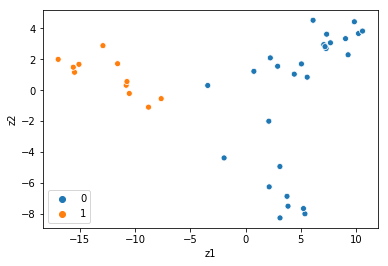

In [95]:
eig_vect = pca_k(X, 2)
pca_X = X.dot(eig_vect)

sns.scatterplot(pca_X[:,0], pca_X[:,1], hue=t[:,0])
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend(loc='lower left')
plt.show()

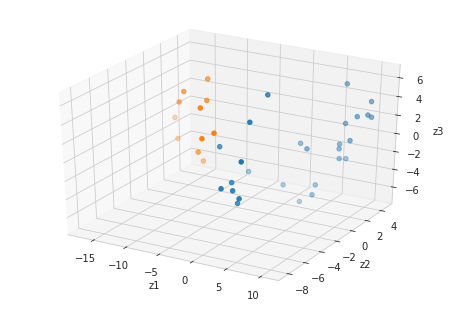

In [113]:
from mpl_toolkits.mplot3d import Axes3D

eig_vect = pca_k(X, 3)
pca_X = np.real(X.dot(eig_vect))

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure()
ax = Axes3D(fig)
fill_colors = ['o' if target==1 else 'b' for target in t[:,0]]

ax.scatter(pca_X[:,0][t[:,0]==0], pca_X[:,1][t[:,0]==0], pca_X[:,2][t[:,0]==0])
ax.scatter(pca_X[:,0][t[:,0]==1], pca_X[:,1][t[:,0]==1], pca_X[:,2][t[:,0]==1])
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')

plt.show()

## 3. Classification
<div class="alert alert-info">
Insofar, we have only considered how carrying out dimensionality reduction allows us to _visually_ distinguish the different classes of the dataset.<br><br>

Using any of the classification algorithms we developed in the previous lectures, assess how classification performance varies when carrying out any of the above feature selection techniques as a preprocessing step. </div>